In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)


In [2]:
df_tweets = pd.read_csv("data/raw_data/twitter_data.csv")

In [3]:
df_tweets.columns

Index(['date', 'tweet', 'lang', 'retweetCount', 'likeCount', 'replyCount',
       'username', 'user_followersCount', 'user_friendsCount',
       'verifiedStatus', 'tweet_url', 'hastags', 'chr_count', 'topic'],
      dtype='object')

In [8]:
df_tweets_filtered= df_tweets[(df_tweets["likeCount"]>100) | (df_tweets["retweetCount"] > 500) | (df_tweets["user_followersCount"] > 3000)][["tweet", "topic"]]

In [9]:
df_tweets_filtered["tweet"] = df_tweets_filtered["tweet"].str.replace("https://", "")

### Pre-processing text data
#### Most of the text data are cleaned by following below steps.

1. Remove punctuations
2. Tokenization - Converting a sentence into list of words
3. Remove stopwords
4. Lammetization/stemming - Tranforming any form of a word to its root word

In [99]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df_tweets_filtered['tweet_punct_removed'] = df_tweets_filtered['tweet'].apply(lambda x: remove_punct(x))
df_tweets_filtered.head(10)

,tweet,topic,tweet_punct_removed
9,This summery port and rum highball evokes the bright character of pineapple soda. RECIPE: t.co/X...,soda,This summery port and rum highball evokes the bright character of pineapple soda RECIPE tcoXjUbk...
22,@barefootcavalry @d33rox Definitely a soda you have to get used to. Not my cup of tea.,soda,barefootcavalry drox Definitely a soda you have to get used to Not my cup of tea
23,@425Akashi Jinx you owe me a soda. Dr. Pepper works,soda,Akashi Jinx you owe me a soda Dr Pepper works
25,"I’ll tell you what, pal… whoever changed the price at the soda machine from .50 to .75, ain’t se...",soda,I’ll tell you what pal… whoever changed the price at the soda machine from to ain’t seeing Heaven
32,@lucklyskinny m voy a dar el lujo d comer 6 galletas d soda pq quemé calorias caminando,soda,lucklyskinny m voy a dar el lujo d comer galletas d soda pq quemé calorias caminando
33,@iyunosdi Would you believe me if I said the sexy soda can game…? t.co/s3jlgXy3Jw,soda,iyunosdi Would you believe me if I said the sexy soda can game… tcosjlgXyJw
39,@pipopthuis @BarristersHorse Lawn: we have a product here called “chauf” (literally ‘heat’). It’...,soda,pipopthuis BarristersHorse Lawn we have a product here called “chauf” literally ‘heat’ It’s conc...
43,@DalinarOG YAKWTFGO #BHG4E #soda t.co/NM1Z8Xwj6c,soda,DalinarOG YAKWTFGO BHGE soda tcoNMZXwjc
44,@tenpa039 @Regardeleciel1 Jangan banyak minum soda tapi banyakkkan minum air putih,soda,tenpa Regardeleciel Jangan banyak minum soda tapi banyakkkan minum air putih
46,@jessay1995 This is what was left. Except the soda machine is leaving haha t.co/I1Zdi5BcZi,soda,jessay This is what was left Except the soda machine is leaving haha tcoIZdiBcZi


In [11]:
df_tweets_filtered[["topic", "tweet", "tweet_punct_removed"]].to_csv("data/cleaned_data/df_tweets_punct.csv")

In [137]:
df_tweets_filtered[["topic", "tweets_cleaned"]].to_csv("cleaned_tweets.csv")

In [13]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df_tweets_filtered['tweet_tokenized'] = df_tweets_filtered['tweet_punct_removed'].apply(lambda x: tokenization(x.lower()))
df_tweets_filtered.head()

,tweet,topic,tweet_punct_removed,tweet_tokenized
9,This summery port and rum highball evokes the bright character of pineapple soda. RECIPE: t.co/X...,soda,This summery port and rum highball evokes the bright character of pineapple soda RECIPE tcoXjUbk...,"[this, summery, port, and, rum, highball, evokes, the, bright, character, of, pineapple, soda, r..."
22,@barefootcavalry @d33rox Definitely a soda you have to get used to. Not my cup of tea.,soda,barefootcavalry drox Definitely a soda you have to get used to Not my cup of tea,"[barefootcavalry, drox, definitely, a, soda, you, have, to, get, used, to, not, my, cup, of, tea]"
23,@425Akashi Jinx you owe me a soda. Dr. Pepper works,soda,Akashi Jinx you owe me a soda Dr Pepper works,"[akashi, jinx, you, owe, me, a, soda, dr, pepper, works]"
25,"I’ll tell you what, pal… whoever changed the price at the soda machine from .50 to .75, ain’t se...",soda,I’ll tell you what pal… whoever changed the price at the soda machine from to ain’t seeing Heaven,"[i, ll, tell, you, what, pal, whoever, changed, the, price, at, the, soda, machine, from, to, ai..."
32,@lucklyskinny m voy a dar el lujo d comer 6 galletas d soda pq quemé calorias caminando,soda,lucklyskinny m voy a dar el lujo d comer galletas d soda pq quemé calorias caminando,"[lucklyskinny, m, voy, a, dar, el, lujo, d, comer, galletas, d, soda, pq, quemé, calorias, camin..."


In [14]:
df_tweets_filtered[["topic", "tweet", "tweet_tokenized"]].to_csv("data/cleaned_data/df_tweets_tokenized.csv")

In [15]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df_tweets_filtered['tweet_nonstop'] = df_tweets_filtered['tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df_tweets_filtered.head(10)

,tweet,topic,tweet_punct_removed,tweet_tokenized,tweet_nonstop
9,This summery port and rum highball evokes the bright character of pineapple soda. RECIPE: t.co/X...,soda,This summery port and rum highball evokes the bright character of pineapple soda RECIPE tcoXjUbk...,"[this, summery, port, and, rum, highball, evokes, the, bright, character, of, pineapple, soda, r...","[summery, port, rum, highball, evokes, bright, character, pineapple, soda, recipe, tcoxjubkvbhys..."
22,@barefootcavalry @d33rox Definitely a soda you have to get used to. Not my cup of tea.,soda,barefootcavalry drox Definitely a soda you have to get used to Not my cup of tea,"[barefootcavalry, drox, definitely, a, soda, you, have, to, get, used, to, not, my, cup, of, tea]","[barefootcavalry, drox, definitely, soda, get, used, cup, tea]"
23,@425Akashi Jinx you owe me a soda. Dr. Pepper works,soda,Akashi Jinx you owe me a soda Dr Pepper works,"[akashi, jinx, you, owe, me, a, soda, dr, pepper, works]","[akashi, jinx, owe, soda, dr, pepper, works]"
25,"I’ll tell you what, pal… whoever changed the price at the soda machine from .50 to .75, ain’t se...",soda,I’ll tell you what pal… whoever changed the price at the soda machine from to ain’t seeing Heaven,"[i, ll, tell, you, what, pal, whoever, changed, the, price, at, the, soda, machine, from, to, ai...","[tell, pal, whoever, changed, price, soda, machine, seeing, heaven]"
32,@lucklyskinny m voy a dar el lujo d comer 6 galletas d soda pq quemé calorias caminando,soda,lucklyskinny m voy a dar el lujo d comer galletas d soda pq quemé calorias caminando,"[lucklyskinny, m, voy, a, dar, el, lujo, d, comer, galletas, d, soda, pq, quemé, calorias, camin...","[lucklyskinny, voy, dar, el, lujo, comer, galletas, soda, pq, quemé, calorias, caminando]"
33,@iyunosdi Would you believe me if I said the sexy soda can game…? t.co/s3jlgXy3Jw,soda,iyunosdi Would you believe me if I said the sexy soda can game… tcosjlgXyJw,"[iyunosdi, would, you, believe, me, if, i, said, the, sexy, soda, can, game, tcosjlgxyjw]","[iyunosdi, would, believe, said, sexy, soda, game, tcosjlgxyjw]"
39,@pipopthuis @BarristersHorse Lawn: we have a product here called “chauf” (literally ‘heat’). It’...,soda,pipopthuis BarristersHorse Lawn we have a product here called “chauf” literally ‘heat’ It’s conc...,"[pipopthuis, barristershorse, lawn, we, have, a, product, here, called, chauf, literally, heat, ...","[pipopthuis, barristershorse, lawn, product, called, chauf, literally, heat, concentrated, caust..."
43,@DalinarOG YAKWTFGO #BHG4E #soda t.co/NM1Z8Xwj6c,soda,DalinarOG YAKWTFGO BHGE soda tcoNMZXwjc,"[dalinarog, yakwtfgo, bhge, soda, tconmzxwjc]","[dalinarog, yakwtfgo, bhge, soda, tconmzxwjc]"
44,@tenpa039 @Regardeleciel1 Jangan banyak minum soda tapi banyakkkan minum air putih,soda,tenpa Regardeleciel Jangan banyak minum soda tapi banyakkkan minum air putih,"[tenpa, regardeleciel, jangan, banyak, minum, soda, tapi, banyakkkan, minum, air, putih]","[tenpa, regardeleciel, jangan, banyak, minum, soda, tapi, banyakkkan, minum, air, putih]"
46,@jessay1995 This is what was left. Except the soda machine is leaving haha t.co/I1Zdi5BcZi,soda,jessay This is what was left Except the soda machine is leaving haha tcoIZdiBcZi,"[jessay, this, is, what, was, left, except, the, soda, machine, is, leaving, haha, tcoizdibczi]","[jessay, left, except, soda, machine, leaving, haha, tcoizdibczi]"


In [16]:
df_tweets_filtered[["topic", "tweet", "tweet_nonstop"]].to_csv("data/cleaned_data/df_tweets_non_stop.csv")

In [17]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_tweets_filtered['tweet_stemmed'] = df_tweets_filtered['tweet_nonstop'].apply(lambda x: stemming(x))
df_tweets_filtered.head()

,tweet,topic,tweet_punct_removed,tweet_tokenized,tweet_nonstop,tweet_stemmed
9,This summery port and rum highball evokes the bright character of pineapple soda. RECIPE: t.co/X...,soda,This summery port and rum highball evokes the bright character of pineapple soda RECIPE tcoXjUbk...,"[this, summery, port, and, rum, highball, evokes, the, bright, character, of, pineapple, soda, r...","[summery, port, rum, highball, evokes, bright, character, pineapple, soda, recipe, tcoxjubkvbhys...","[summeri, port, rum, highbal, evok, bright, charact, pineappl, soda, recip, tcoxjubkvbhi, tcojva..."
22,@barefootcavalry @d33rox Definitely a soda you have to get used to. Not my cup of tea.,soda,barefootcavalry drox Definitely a soda you have to get used to Not my cup of tea,"[barefootcavalry, drox, definitely, a, soda, you, have, to, get, used, to, not, my, cup, of, tea]","[barefootcavalry, drox, definitely, soda, get, used, cup, tea]","[barefootcavalri, drox, definit, soda, get, use, cup, tea]"
23,@425Akashi Jinx you owe me a soda. Dr. Pepper works,soda,Akashi Jinx you owe me a soda Dr Pepper works,"[akashi, jinx, you, owe, me, a, soda, dr, pepper, works]","[akashi, jinx, owe, soda, dr, pepper, works]","[akashi, jinx, owe, soda, dr, pepper, work]"
25,"I’ll tell you what, pal… whoever changed the price at the soda machine from .50 to .75, ain’t se...",soda,I’ll tell you what pal… whoever changed the price at the soda machine from to ain’t seeing Heaven,"[i, ll, tell, you, what, pal, whoever, changed, the, price, at, the, soda, machine, from, to, ai...","[tell, pal, whoever, changed, price, soda, machine, seeing, heaven]","[tell, pal, whoever, chang, price, soda, machin, see, heaven]"
32,@lucklyskinny m voy a dar el lujo d comer 6 galletas d soda pq quemé calorias caminando,soda,lucklyskinny m voy a dar el lujo d comer galletas d soda pq quemé calorias caminando,"[lucklyskinny, m, voy, a, dar, el, lujo, d, comer, galletas, d, soda, pq, quemé, calorias, camin...","[lucklyskinny, voy, dar, el, lujo, comer, galletas, soda, pq, quemé, calorias, caminando]","[lucklyskinni, voy, dar, el, lujo, comer, galleta, soda, pq, quemé, caloria, caminando]"


In [18]:
df_tweets_filtered[["topic", "tweet", "tweet_stemmed"]].to_csv("data/cleaned_data/df_tweets_stemmed.csv")

In [19]:
#nltk.download('wordnet')
#nltk.download('omw-1.4')

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df_tweets_filtered['tweet_lemmatized'] = df_tweets_filtered['tweet_nonstop'].apply(lambda x: lemmatizer(x))
df_tweets_filtered.head()

,tweet,topic,tweet_punct_removed,tweet_tokenized,tweet_nonstop,tweet_stemmed,tweet_lemmatized
9,This summery port and rum highball evokes the bright character of pineapple soda. RECIPE: t.co/X...,soda,This summery port and rum highball evokes the bright character of pineapple soda RECIPE tcoXjUbk...,"[this, summery, port, and, rum, highball, evokes, the, bright, character, of, pineapple, soda, r...","[summery, port, rum, highball, evokes, bright, character, pineapple, soda, recipe, tcoxjubkvbhys...","[summeri, port, rum, highbal, evok, bright, charact, pineappl, soda, recip, tcoxjubkvbhi, tcojva...","[summery, port, rum, highball, evokes, bright, character, pineapple, soda, recipe, tcoxjubkvbhys..."
22,@barefootcavalry @d33rox Definitely a soda you have to get used to. Not my cup of tea.,soda,barefootcavalry drox Definitely a soda you have to get used to Not my cup of tea,"[barefootcavalry, drox, definitely, a, soda, you, have, to, get, used, to, not, my, cup, of, tea]","[barefootcavalry, drox, definitely, soda, get, used, cup, tea]","[barefootcavalri, drox, definit, soda, get, use, cup, tea]","[barefootcavalry, drox, definitely, soda, get, used, cup, tea]"
23,@425Akashi Jinx you owe me a soda. Dr. Pepper works,soda,Akashi Jinx you owe me a soda Dr Pepper works,"[akashi, jinx, you, owe, me, a, soda, dr, pepper, works]","[akashi, jinx, owe, soda, dr, pepper, works]","[akashi, jinx, owe, soda, dr, pepper, work]","[akashi, jinx, owe, soda, dr, pepper, work]"
25,"I’ll tell you what, pal… whoever changed the price at the soda machine from .50 to .75, ain’t se...",soda,I’ll tell you what pal… whoever changed the price at the soda machine from to ain’t seeing Heaven,"[i, ll, tell, you, what, pal, whoever, changed, the, price, at, the, soda, machine, from, to, ai...","[tell, pal, whoever, changed, price, soda, machine, seeing, heaven]","[tell, pal, whoever, chang, price, soda, machin, see, heaven]","[tell, pal, whoever, changed, price, soda, machine, seeing, heaven]"
32,@lucklyskinny m voy a dar el lujo d comer 6 galletas d soda pq quemé calorias caminando,soda,lucklyskinny m voy a dar el lujo d comer galletas d soda pq quemé calorias caminando,"[lucklyskinny, m, voy, a, dar, el, lujo, d, comer, galletas, d, soda, pq, quemé, calorias, camin...","[lucklyskinny, voy, dar, el, lujo, comer, galletas, soda, pq, quemé, calorias, caminando]","[lucklyskinni, voy, dar, el, lujo, comer, galleta, soda, pq, quemé, caloria, caminando]","[lucklyskinny, voy, dar, el, lujo, comer, galletas, soda, pq, quemé, calorias, caminando]"


In [20]:
df_tweets_filtered[["topic", "tweet", "tweet_lemmatized"]].to_csv("data/cleaned_data/df_tweets_lemmatized.csv")

In [22]:
df_tweets_filtered["tweets_cleaned"] = df_tweets_filtered["tweet_lemmatized"].apply(lambda x: " ".join(x))

In [23]:
labels = df_tweets_filtered[["topic"]].reset_index(drop = True)
text = df_tweets_filtered[["tweets_cleaned"]].reset_index(drop = True)

In [24]:
df_tweets_filtered[["topic", "tweet", "tweets_cleaned"]].to_csv("data/cleaned_data/df_tweets_cleaned.csv")

In [25]:
countVectorizer = CountVectorizer(max_df=6, min_df=1, max_features=1000, strip_accents="ascii") 
countVector = countVectorizer.fit_transform(df_tweets_filtered['tweets_cleaned'])
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

C:\Users\Akhilesh\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aap,ability,abortion,abt,academic,academy,accept,account,acid,action,...,wt,wtf,ya,yea,yg,yo,yoga,york,younger,zubymusic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
count_vect_df_ = pd.concat([labels, count_vect_df], axis=1)

In [29]:
count_vect_df_.to_csv("data/cleaned_data/df_tweets_cv.csv")

# Visualisation

#### Let us look at the number of characters present in each sentence. This can give us a rough idea about the tweet length.

In [35]:
import plotly.graph_objects as go
import plotly.express as px

In [45]:
df_hist_char = pd.DataFrame()
df_hist_char["before_cleaning"] = df_tweets_filtered['tweet'].str.len()
df_hist_char["after_cleaning"] = df_tweets_filtered["tweets_cleaned"].str.len()


In [46]:
fig = go.Figure()
fig.add_histogram(x=df_hist_char["before_cleaning"], name = "Length of character before cleaning")
fig.add_histogram(x=df_hist_char["after_cleaning"], name = "Length of character before cleaning")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Now, we will move on to data exploration at a word-level. Let’s plot the number of words appearing in each tweet.

In [48]:
df_hist_word = pd.DataFrame()
df_hist_word["before_cleaning"] = df_tweets_filtered['tweet'].str.split().map(lambda x: len(x))
df_hist_word["after_cleaning"] = df_tweets_filtered["tweets_cleaned"].str.split().map(lambda x: len(x))


In [50]:
fig = go.Figure()
fig.add_histogram(x=df_hist_word["before_cleaning"], name = "Length of words before cleaning")
fig.add_histogram(x=df_hist_word["after_cleaning"], name = "Length of words before cleaning")
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

#### Up next, let’s check the average word length in each sentence. 

<AxesSubplot:>

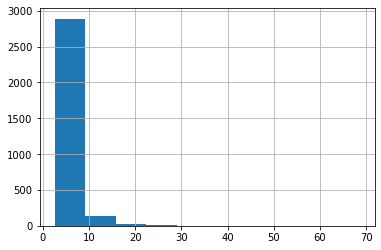

In [113]:
df_tweets_filtered['tweet'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [74]:
corpus=[]
new = df_tweets_filtered['tweet'].str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

In [64]:
import seaborn as sns
from collections import Counter

In [65]:
df_bar_unigram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])

In [66]:
df_bar_unigram

,word,freq
0,obesity,901
1,soda,788
2,I,655
3,The,267
4,&amp;,240
5,Soda,235
6,tax,224
7,Obesity,223
8,health,202
9,-,192


In [67]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stopword):
        x.append(word)
        y.append(count)

#sns.barplot(x=y,y=x)
fig = px.bar(df_bar_unigram, x="freq", y="word", orientation='h')
fig.show()

In [81]:
from nltk.util import ngrams
from nltk.corpus import stopwords
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    df_bar_ngram = pd.DataFrame(list(zip(x,y)), columns = ["word", "freq"])
    fig = px.bar(df_bar_ngram, x="freq", y="word", orientation='h')
    fig.show()
    #sns.barplot(x=y,y=x)

In [83]:
plot_top_ngrams_barchart(df_tweets_filtered['tweets_cleaned'],2)


### Wordclouds

In [121]:
df_tweets_filtered["topic"].value_counts()

obesity         1491
soda            1040
soda taxes       422
soda obesity     126
Name: topic, dtype: int64

In [122]:
def build_corpus(df):
    corupus = []
    new = df['tweet'].str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    return corpus

In [123]:
corpus_obesity = build_corpus(df_tweets_filtered[df_tweets_filtered["topic"] == "obesity"])
corpus_soda = build_corpus(df_tweets_filtered[df_tweets_filtered["topic"] == "soda"])
corpus_soda_taxes = build_corpus(df_tweets_filtered[df_tweets_filtered["topic"] == "soda taxes"])
corpus_soda_obesity = build_corpus(df_tweets_filtered[df_tweets_filtered["topic"] == "soda obesity"])

In [126]:
corpus_soda_obesity

['Kids,',
 'soda',
 'and',
 'obesity',
 't.co/iSOoBYY1c3',
 'Some',
 'people',
 'have',
 'not',
 'once',
 'experienced',
 'the',
 'feeling',
 'of',
 'being',
 'healthy.',
 'They',
 'tumble',
 'out',
 'of',
 'their',
 'mother’s',
 'womb',
 'and',
 'are',
 'immediately',
 'given',
 'soda',
 'and',
 'candy.',
 'It’s',
 'terrible',
 'parenting.',
 'Then',
 'we',
 'start',
 'complaining',
 'of',
 'obesity',
 'and',
 'diabetes',
 'epidemic.',
 "Don't",
 'feed',
 'kids',
 'junk',
 'food',
 '@FitFounder',
 'Fast',
 'food',
 'and',
 'soda',
 'lobby',
 'groups',
 'will',
 'never',
 'allow',
 'a',
 'politician',
 'to',
 'say',
 'obesity',
 'is',
 'a',
 'public',
 'health',
 'emergency.',
 'Never.',
 'Diet',
 'soda',
 '(or',
 'pop',
 'for',
 'those',
 'of',
 'you',
 'who',
 'use',
 'that',
 'word)',
 'has',
 'a',
 'bad',
 'reputation,',
 'but',
 'science',
 'disagrees.',
 'It',
 'does',
 'not',
 'cause',
 '#diabetes,',
 '#obesity,',
 'or',
 'anything.',
 't.co/zCoho6lGlC',
 'Diet',
 'soda',
 '(or'

In [134]:
from wordcloud import WordCloud, STOPWORDS
def plot_word_cloud(corpus):
    wordcloud = WordCloud(
            background_color='white',
            stopwords=set(STOPWORDS),
            max_words=250,
            max_font_size=30, 
            scale=3,
            random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

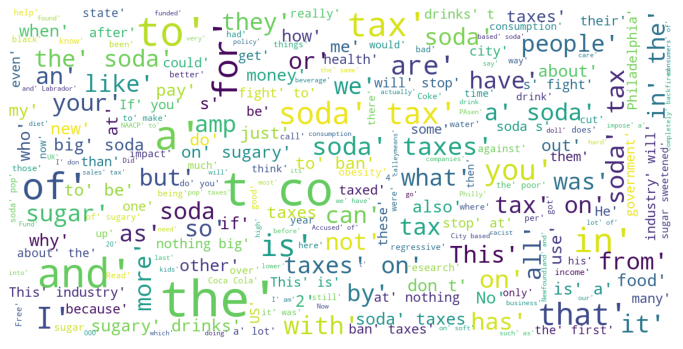

In [135]:
plot_word_cloud(corpus_soda_taxes)